In [1]:
import pandas as pd
from pathlib import Path
import hvplot.pandas

In [2]:
predictions_df = pd.read_csv(
    Path("heart_failure_clinical_records_dataset.csv")
)

# Review the DataFrame
predictions_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
y = predictions_df["DEATH_EVENT"]
X = predictions_df.drop(columns="DEATH_EVENT")

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(224, 12)

In [5]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [6]:
 LogisticRegression(max_iter=200, random_state=1)

LogisticRegression(max_iter=200, random_state=1)

In [7]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [8]:
 LogisticRegression(max_iter=200, random_state=1)

LogisticRegression(max_iter=200, random_state=1)

In [9]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8348214285714286
Testing Data Score: 0.7733333333333333


In [10]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,0,0
7,0,0
8,0,0
9,0,0


In [11]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.7733333333333333

In [12]:
 from sklearn.metrics import classification_report
target_names = ["Death Event", "Comorbidity"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

 Death Event       0.83      0.84      0.83        51
 Comorbidity       0.65      0.62      0.64        24

    accuracy                           0.77        75
   macro avg       0.74      0.73      0.74        75
weighted avg       0.77      0.77      0.77        75



In [13]:
# Start by importing the K-means algorithm
from sklearn.cluster import KMeans

In [14]:
# Create and initialize the K-means model instance for 2 clusters
model = KMeans(n_clusters=2, random_state=1)

# Print the model
model

KMeans(n_clusters=2, random_state=1)

In [15]:
 KMeans(n_clusters=2, random_state=1)

KMeans(n_clusters=2, random_state=1)

In [16]:
# Fit the data to the instance of the model
model.fit(predictions_df)

C:\Users\justen.hix\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\justen.hix\anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=2, random_state=1)

In [17]:
KMeans(n_clusters=2, random_state=1)

KMeans(n_clusters=2, random_state=1)

In [18]:
 # Make predictions about the data clusters using the trained model
chance_death = model.predict(predictions_df)

# Print the predictions
print(chance_death)

[0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0
 1 0 1]


In [19]:
# Create a copy of the DataFrame
predictions2_df = predictions_df.copy()

# Add a column to the DataFrame that contains the chance of death information
predictions2_df['chance of death'] = chance_death

# Review the DataFrame
predictions2_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,chance of death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1


In [23]:
predictions_df.hvplot.scatter(x="diabetes", y="age", by='DEATH_EVENT')

:NdOverlay   [DEATH_EVENT]
   :Scatter   [diabetes]   (age)

In [24]:
predictions_df.hvplot.scatter(x="age", y="platelets", by='DEATH_EVENT')
 

:NdOverlay   [DEATH_EVENT]
   :Scatter   [age]   (platelets)

In [25]:

predictions_df.hvplot.scatter(x="age", y="serum_creatinine", by='DEATH_EVENT')

:NdOverlay   [DEATH_EVENT]
   :Scatter   [age]   (serum_creatinine)

In [26]:

predictions_df.hvplot.scatter(x="age", y="creatinine_phosphokinase", by='DEATH_EVENT')

:NdOverlay   [DEATH_EVENT]
   :Scatter   [age]   (creatinine_phosphokinase)

In [27]:

predictions_df.hvplot.scatter(x="age", y="serum_sodium", by='DEATH_EVENT')

:NdOverlay   [DEATH_EVENT]
   :Scatter   [age]   (serum_sodium)

In [28]:

predictions_df.hvplot.scatter(x="age", y="ejection_fraction", by='DEATH_EVENT')

:NdOverlay   [DEATH_EVENT]
   :Scatter   [age]   (ejection_fraction)

In [29]:
predictions_df.hvplot.scatter(x="age", y="time", by='DEATH_EVENT')

:NdOverlay   [DEATH_EVENT]
   :Scatter   [age]   (time)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

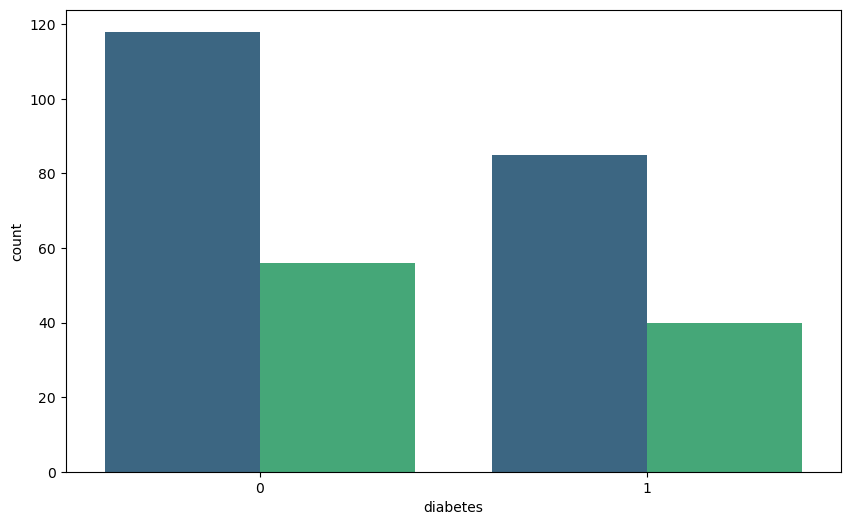

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as py


plt.figure(figsize=(10, 6))
sns.countplot(data=predictions_df, x='diabetes', hue='DEATH_EVENT', palette='viridis')
plt.title('Count of Death Events by Diabetes Status')
plt.xlabel('diabetes')
plt.ylabel('Count')
plt.legend(title='Death Event')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

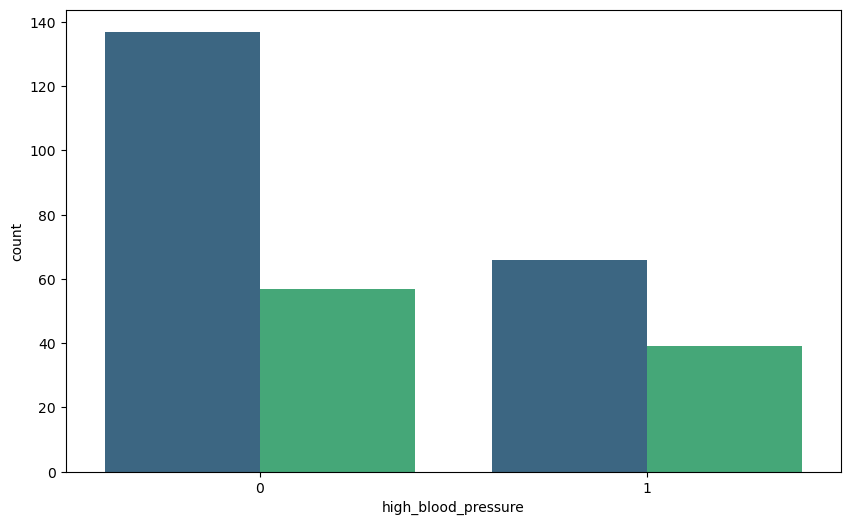

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(data=predictions_df, x='high_blood_pressure', hue='DEATH_EVENT', palette='viridis')
plt.title('Count of Death Events by high_blood_pressure Status')
plt.xlabel('high_blood_pressure')
plt.ylabel('Count')
plt.legend(title='Death Event')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

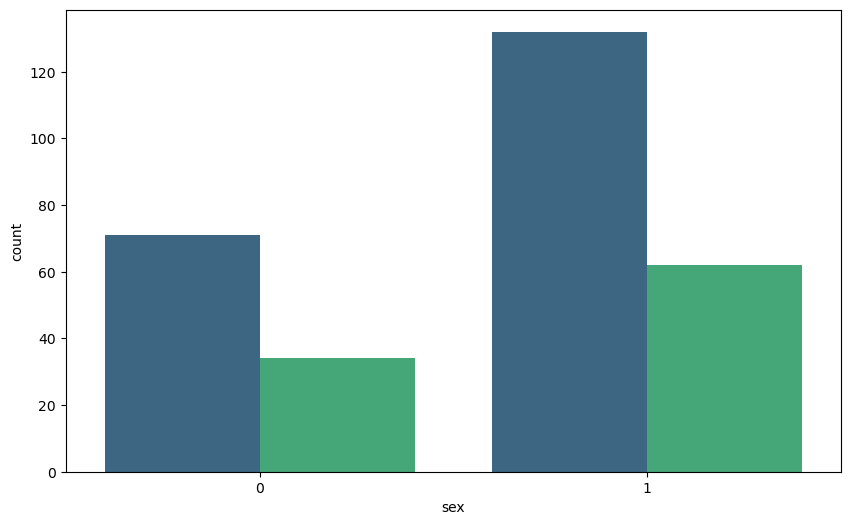

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(data=predictions_df, x='sex', hue='DEATH_EVENT', palette='viridis')
plt.title('Count of Death Events by Sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title='Death Event')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

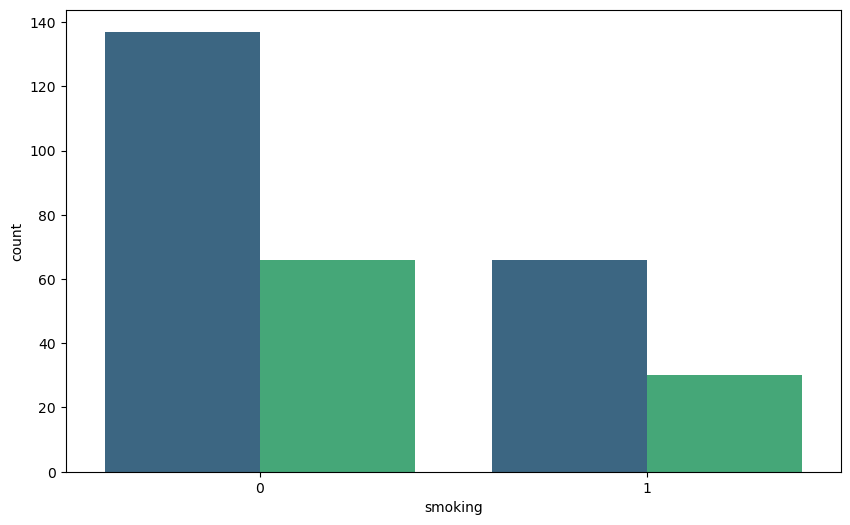

In [34]:
plt.figure(figsize=(10, 6))
sns.countplot(data=predictions_df, x='smoking', hue='DEATH_EVENT', palette='viridis')
plt.title('Count of Death Events by Smoking Status')
plt.xlabel('smoking')
plt.ylabel('Count')
plt.legend(title='Death Event')
plt.show()